In [1]:
import pandas as pd
import sys

sys.path.append('../../')
from src.transform import load_json,transform_diff_avg,transform_diff_experiments
from src.plot_helpers import plot_experiment_range,plot_correlation_matrix,plot_boxplot

indoors_cols = load_json("../../json/locations.json")["wings_indoors"]

In [2]:
df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)
df_air_indoor = pd.read_csv('../../data/clean_data/airwings.csv',index_col=0,parse_dates=True)

df_air_indoor = df_air_indoor.loc[(df_air_indoor['sensor'] == 'air_wings_indoor') | (df_air_indoor['sensor'] == 'air_wings_indoor_ref'), indoors_cols]

df_air_indoor.rename(columns={'device_id': 'sensor'}, inplace=True)
df_air_indoor['sensor'] = 'AWI_indoor_' + df_air_indoor['sensor'].astype(str)

df_air_indoor

/tmp/ipykernel_1938806/3833256816.py:1: DtypeWarning: Columns (6,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)


co2     tvoc   co  pm_1.0  pm_2.5  pm_10  \
datetime                                                            
2024-10-16 05:00:43   657.32     0.00  0.5    2.15    2.27   2.24   
2024-10-16 05:01:43   657.32     0.00  0.5    2.15    2.25   2.23   
2024-10-16 05:02:43   657.31     0.00  0.5    2.13    2.24   2.22   
2024-10-16 05:03:43   657.31     0.00  0.5    2.05    2.15   2.13   
2024-10-16 05:04:43   657.31     0.00  0.5    2.00    2.11   2.09   
...                      ...      ...  ...     ...     ...    ...   
2024-10-20 23:36:15  1053.40  1217.67  0.5   36.02   38.17  38.26   
2024-10-20 23:41:15  1054.87  1224.10  0.5   36.10   38.21  38.25   
2024-10-20 23:46:16  1055.30  1226.17  0.5   36.24   38.34  38.35   
2024-10-20 23:51:16  1056.97  1233.67  0.5   36.84   38.96  38.97   
2024-10-20 23:56:17  1060.37  1248.20  0.5   36.93   39.16  39.30   

                     temperature  humidity  pressure            sensor  
datetime                                                                
2024-10-16 05:00:43        26.60      33.0   1010.26    AWI_indoor_2.0  
2024-10-16 05:01:43        26.60      33.0   1010.28    AWI_indoor_2.0  
2024-10-16 05:02:43        26.60      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:03:43        26.59      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:04:43        26.59      33.0   1010.31    AWI_indoor_2.0  
...                          ...       ...       ...               ...  
2024-10-20 23:36:15        26.49      41.0   1017.03  AWI_indoor_316.0  
2024-10-20 23:41:15        26.49      41.0   1017.02  AWI_indoor_316.0  
2024-10-20 23:46:16        26.48      41.0   1017.05  AWI_indoor_316.0  
2024-10-20 23:51:16        26.46      41.0   1016.99  AWI_indoor_316.0  
2024-10-20 23:56:17        26.45      41.0   1017.04  AWI_indoor_316.0  

[81753 rows x 10 columns]

In [9]:
pressure_full = pd.concat([df_air_indoor[["pressure","sensor"]],df[["pressure","sensor"]]],axis=0)
pressure_full


pressure          sensor
datetime                                     
2024-10-16 05:00:43   1010.26  AWI_indoor_2.0
2024-10-16 05:01:43   1010.28  AWI_indoor_2.0
2024-10-16 05:02:43   1010.30  AWI_indoor_2.0
2024-10-16 05:03:43   1010.30  AWI_indoor_2.0
2024-10-16 05:04:43   1010.31  AWI_indoor_2.0
...                       ...             ...
2024-10-23 13:31:00   1019.05      ref_sensor
2024-10-23 13:32:00   1019.08      ref_sensor
2024-10-23 13:33:00   1019.08      ref_sensor
2024-10-23 13:34:00   1019.09      ref_sensor
2024-10-23 13:35:00   1019.06      ref_sensor

[660362 rows x 2 columns]

In [10]:
pivot_full = pd.DataFrame()

for col in pressure_full["sensor"].unique():
    
    pivot_full = pd.concat([pivot_full,pressure_full.loc[pressure_full['sensor'] == col].pivot_table(index='datetime', columns='sensor', values='pressure')],axis=1)

pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17']

sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 05:04:00       1010.3250     1012.260833       1012.8650   
2024-10-16 05:08:00       1010.3600     1012.274167       1012.8750   
2024-10-16 05:12:00       1010.3975     1012.288333       1012.8900   
2024-10-16 05:16:00       1010.4300     1012.287500       1012.8850   
2024-10-16 05:20:00       1010.4050     1012.321667       1012.9225   
...                             ...             ...             ...   
2024-10-20 23:40:00       1015.3400     1017.160909       1017.7600   
2024-10-20 23:44:00       1015.3225     1017.183333       1017.7850   
2024-10-20 23:48:00       1015.3450     1017.155833       1017.7700   
2024-10-20 23:52:00       1015.3750     1017.174167       1017.7775   
2024-10-20 23:56:00       1015.3775     1017.175000       1017.7750   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 05:04:00     1013.130000       1013.4200       1012.6900   
2024-10-16 05:08:00     1013.152500       1013.4425       1012.7050   
2024-10-16 05:12:00     1013.153333       1013.4350       1012.7050   
2024-10-16 05:16:00     1013.142500       1013.4375       1012.7025   
2024-10-16 05:20:00     1013.170000       1013.4725       1012.7350   
...                             ...             ...             ...   
2024-10-20 23:40:00     1017.975000       1018.2900       1017.5900   
2024-10-20 23:44:00     1017.972500       1018.3275       1017.6025   
2024-10-20 23:48:00     1017.965000       1018.2950       1017.5800   
2024-10-20 23:52:00     1017.985000       1018.3050       1017.6075   
2024-10-20 23:56:00     1017.972500       1018.3200       1017.6125   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 05:04:00       1013.1750       1013.0950        1012.6275   
2024-10-16 05:08:00       1013.1975       1013.1125        1012.6425   
2024-10-16 05:12:00       1013.1925       1013.1175        1012.6500   
2024-10-16 05:16:00       1013.1925       1013.1000        1012.6500   
2024-10-16 05:20:00       1013.2350       1013.1475        1012.6900   
...                             ...             ...              ...   
2024-10-20 23:40:00       1018.0525       1017.9950        1017.5425   
2024-10-20 23:44:00       1018.0575       1018.0025        1017.5550   
2024-10-20 23:48:00       1018.0300       1017.9625        1017.5300   
2024-10-20 23:52:00       1018.0425       1017.9875        1017.5525   
2024-10-20 23:56:00       1018.0575       1018.0000        1017.5625   

sensor               AWI_indoor_11.0  AWI_indoor_12.0  AWI_indoor_13.0  \
datetime                                                                 
2024-10-16 05:04:00        1012.9625        1013.7625        1013.2775   
2024-10-16 05:08:00        1012.9950        1013.7850        1013.2950   
2024-10-16 05:12:00        1012.9900        1013.7900        1013.3075   
2024-10-16 05:16:00        1012.9850        1013.7750        1013.3000   
2024-10-16 05:20:00        1013.0250        1013.8100        1013.3375   
...                              ...              ...              ...   
2024-10-20 23:40:00        1017.8575        1018.6450        1018.1675   
2024-10-20 23:44:00        1017.8700        1018.6525        1018.1900   
2024-10-20 23:48:00        1017.8600        1018.6325        1018.1550   
2024-10-20 23:52:00        1017.8850        1018.6625        1018.1825   
2024-10-20 23:56:00        1017.8925        1018.6650        1018.1825   

sensor               AWI_indoor_14.0  AWI_indoor_15.0  AWI_indoor_316.0  \
datetime                                                                  
2024-10-16 05:04:00        1013.5125        1013.6700               NaN   
2024-10-16 05:08:00        

## Correlation matrix

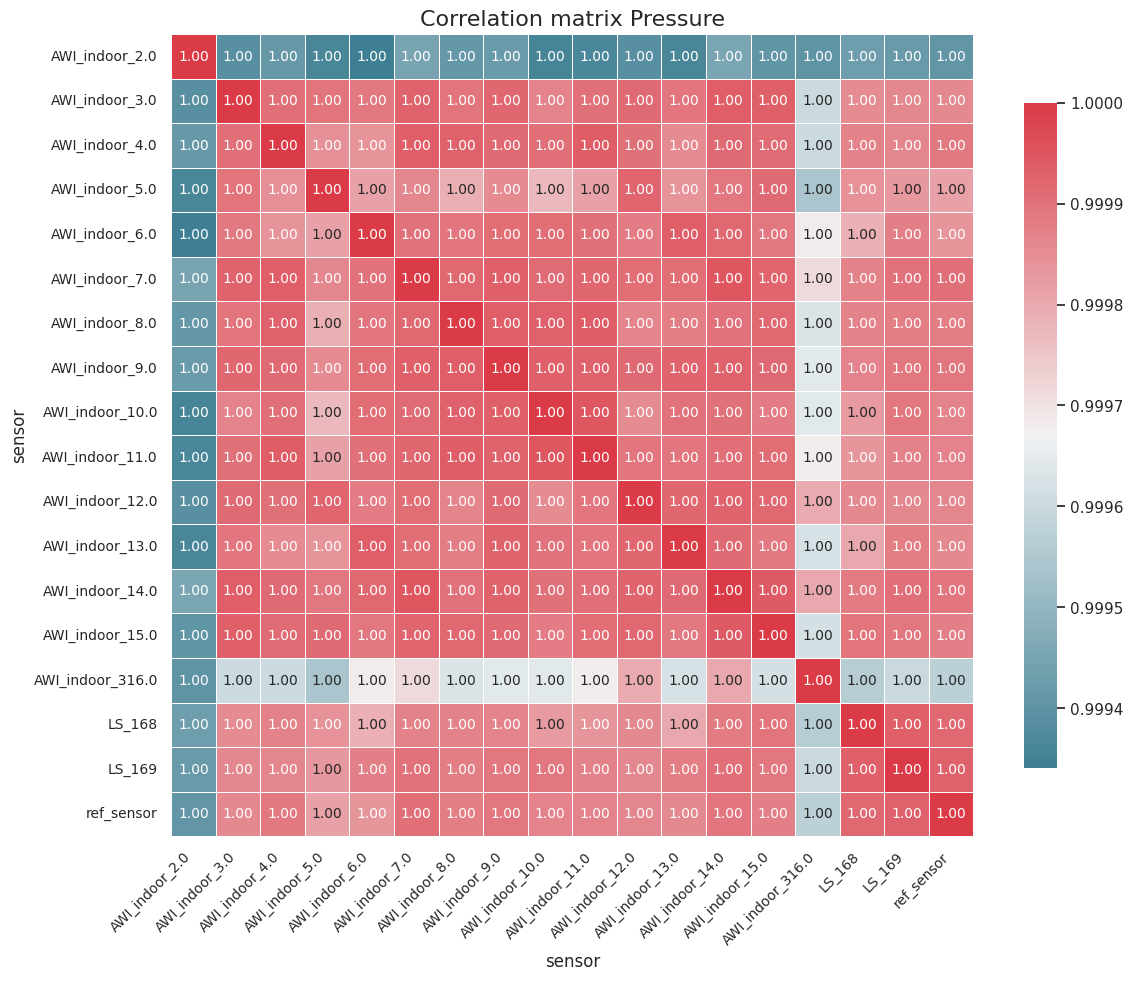

In [11]:
plot_correlation_matrix(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'].corr(),"Correlation matrix Pressure")

## Box plots

In [14]:
plot_boxplot(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'],col_names=['AWI_indoor_2.0','AWI_indoor_15.0','AWI_indoor_316.0','LS_168','LS_169','ref_sensor'])

## Time series plot

In [16]:
plot_experiment_range(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'],col_names=['AWI_indoor_316.0','LS_168','LS_169','ref_sensor'])

In [17]:
diff_df = transform_diff_avg(pivot_full.resample('240s').mean())
diff_df

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:16: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Doors opened  Hall opened  Indoor Room Air Exchange  \
sensor                                                                  
AWI_indoor_2.0        0.003645     0.000464                  0.002003   
AWI_indoor_3.0        0.002395     0.000756                  0.001306   
AWI_indoor_4.0        0.001942     0.000678                  0.000896   
AWI_indoor_5.0        0.002927     0.001233                  0.002069   
AWI_indoor_6.0        0.001478     0.000801                  0.001255   
AWI_indoor_7.0        0.002897     0.001449                  0.001730   
AWI_indoor_8.0        0.001232     0.000555                  0.001112   
AWI_indoor_9.0        0.002866     0.000709                  0.001441   
AWI_indoor_10.0       0.002281     0.000534                  0.000865   
AWI_indoor_11.0       0.002753     0.001069                  0.001143   
AWI_indoor_12.0       0.002792     0.001314                  0.002253   
AWI_indoor_13.0       0.003183     0.001233                  0.002007   
AWI_indoor_14.0       0.003480     0.001212                  0.002171   
AWI_indoor_15.0       0.002597     0.001047                  0.001142   
AWI_indoor_316.0      0.001604     0.000864                  0.002226   
LS_168                0.001796     0.000865                  0.002852   
LS_169                0.001537     0.000919                  0.002512   
ref_sensor            0.002465     0.001973                  0.002718   

                  Rowing CD  Rowing OD  Human Presence  Diffuser (Water)  \
sensor                                                                     
AWI_indoor_2.0     0.003910   0.001737       -0.002403         -0.000248   
AWI_indoor_3.0     0.005141   0.001982       -0.003342         -0.002233   
AWI_indoor_4.0     0.004705   0.001584       -0.003027         -0.001858   
AWI_indoor_5.0     0.004332   0.001881       -0.003240         -0.001548   
AWI_indoor_6.0     0.000000   0.000891       -0.003318         -0.001485   
AWI_indoor_7.0     0.005077   0.003169       -0.003542         -0.001301   
AWI_indoor_8.0     0.004765   0.002178       -0.003597         -0.002167   
AWI_indoor_9.0     0.004703   0.001534       -0.002835         -0.002167   
AWI_indoor_10.0    0.005448   0.001766       -0.003373         -0.001610   
AWI_indoor_11.0    0.004952   0.001980       -0.003747         -0.002291   
AWI_indoor_12.0    0.004515   0.001814       -0.003283         -0.001980   
AWI_indoor_13.0    0.004702   0.002969       -0.003172         -0.002104   
AWI_indoor_14.0    0.000000   0.002556       -0.003247         -0.001795   
AWI_indoor_15.0    0.005072   0.001534       -0.003509         -0.001547   
AWI_indoor_316.0   0.004708  -0.000198       -0.003289         -0.002727   
LS_168             0.004391   0.001410       -0.003253         -0.001382   
LS_169             0.004406   0.000132       -0.003446         -0.000082   
ref_sensor         0.002724   0.001485       -0.003444         -0.001053   

                  Diffuser (Oil)  Car (3m)  Car (5m)  Gas Burner (CD)  \
sensor                                                                  
AWI_indoor_2.0         -0.003353 -0.003726 -0.002401        -0.004471   
AWI_indoor_3.0         -0.003253 -0.003414  0.001983        -0.003504   
AWI_indoor_4.0         -0.001734 -0.003965  0.001404        -0.003199   
AWI_indoor_5.0         -0.003034 -0.002229  0.001734        -0.003598   
AWI_indoor_6.0         -0.004085 -0.004457  0.000495        -0.003842   
AWI_indoor_7.0         -0.002973 -0.001487  0.000000        -0.003415   
AWI_indoor_8.0         -0.003199 -0.004211  0.001651        -0.003382   
AWI_indoor_9.0         -0.003426 -0.003716  0.000495        -0.003352   
AWI_indoor_10.0        -0.003469 -0.003800  0.001900        -0.003291   
AWI_indoor_11.0        -0.003716 -0.003386  0.000743        -0.003260   
AWI_indoor_12.0        -0.003651 -0.003218  0.000578        -0.003657   
AWI_indoor_13.0        -0.003590 -0.003715  0.001981        -0.003412   
AWI_indoor_14.

### Correlation matrix for diff DataFrame

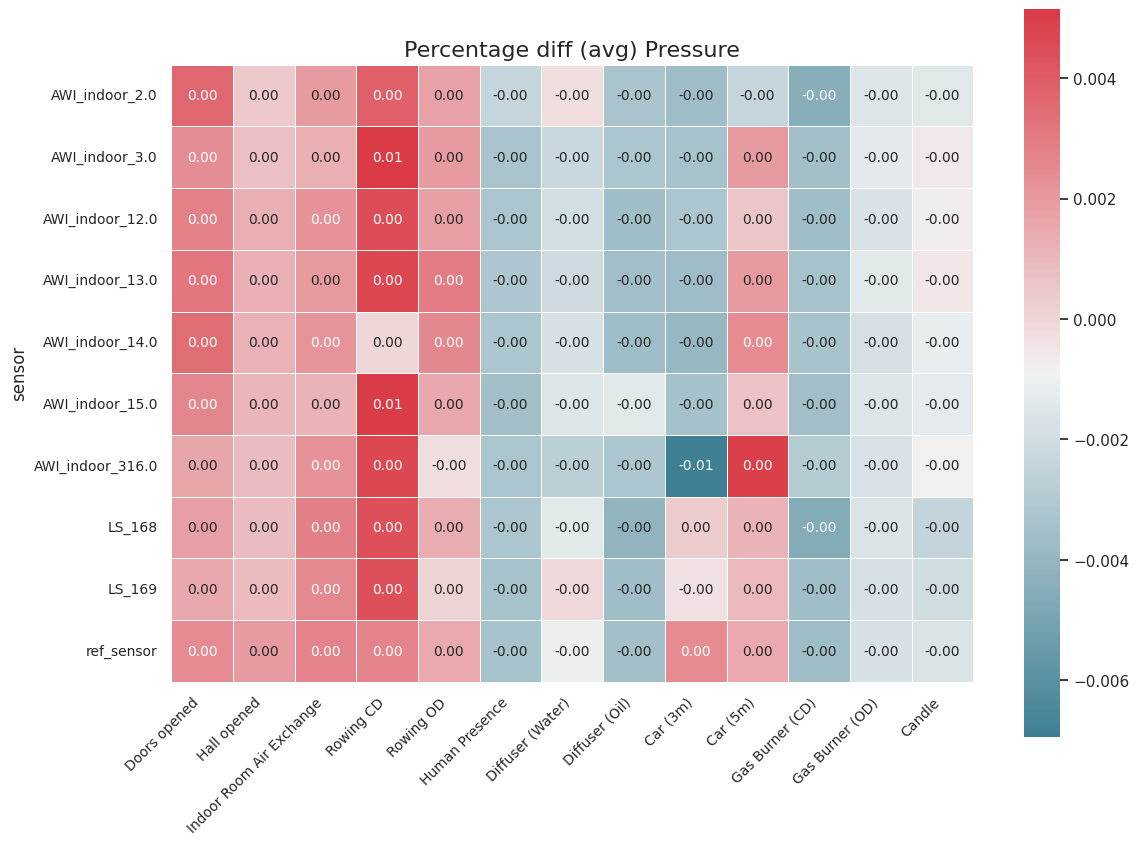

In [18]:
plot_correlation_matrix(diff_df.drop(['AWI_indoor_4.0','AWI_indoor_5.0','AWI_indoor_6.0','AWI_indoor_7.0','AWI_indoor_8.0','AWI_indoor_9.0','AWI_indoor_10.0','AWI_indoor_11.0']),title="Percentage diff (avg) Pressure")

###

In [19]:
df_diff_exp_data = transform_diff_experiments(pivot_full.resample('240s').mean())
df_diff_exp_data

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:37: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 09:16:00        0.002966        0.003125        0.006328   
2024-10-16 09:20:00        0.001977        0.006414        0.003287   
2024-10-16 09:24:00       -0.000247        0.004722        0.000000   
2024-10-16 09:28:00       -0.000741       -0.000775        0.001972   
2024-10-16 09:32:00       -0.001483        0.000224        0.000000   
...                             ...             ...             ...   
2024-10-20 14:56:00        0.000000        0.001433        0.001067   
2024-10-20 15:00:00       -0.001481       -0.000985       -0.000821   
2024-10-20 15:04:00       -0.003208        0.000493       -0.000739   
2024-10-20 15:08:00       -0.003208       -0.001675       -0.003200   
2024-10-20 15:12:00       -0.000987       -0.004072       -0.003939   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 09:16:00        0.000000        0.004189        0.004439   
2024-10-16 09:20:00        0.003287        0.001232        0.003452   
2024-10-16 09:24:00        0.002876        0.001971        0.000986   
2024-10-16 09:28:00        0.003944       -0.000246        0.000329   
2024-10-16 09:32:00        0.000000        0.001725        0.003616   
...                             ...             ...             ...   
2024-10-20 14:56:00        0.001231        0.000492        0.000246   
2024-10-20 15:00:00       -0.001723       -0.000246       -0.001723   
2024-10-20 15:04:00        0.000000       -0.000738       -0.000492   
2024-10-20 15:08:00       -0.000985       -0.001722       -0.002954   
2024-10-20 15:12:00       -0.005415       -0.003690       -0.005171   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 09:16:00        0.000000        0.006163         0.005919   
2024-10-16 09:20:00        0.002629        0.007313         0.006083   
2024-10-16 09:24:00        0.000575        0.000000        -0.000164   
2024-10-16 09:28:00       -0.000246       -0.000657         0.000000   
2024-10-16 09:32:00        0.003451        0.002958         0.000986   
...                             ...             ...              ...   
2024-10-20 14:56:00        0.001230        0.000000        -0.001477   
2024-10-20 15:00:00       -0.001723        0.000000        -0.001970   
2024-10-20 15:04:00        0.000492       -0.000246        -0.001723   
2024-10-20 15:08:00       -0.002215       -0.002215        -0.001723   
2024-10-20 15:12:00       -0.003445       -0.005168        -0.003201   

sensor               AWI_indoor_11.0  AWI_indoor_12.0  AWI_indoor_13.0  \
datetime                                                                 
2024-10-16 09:16:00         0.006575         0.006323         0.005422   
2024-10-16 09:20:00         0.005259         0.002217         0.007640   
2024-10-16 09:24:00         0.001315         0.002463         0.002218   
2024-10-16 09:28:00         0.000329         0.001149         0.001232   
2024-10-16 09:32:00         0.002136         0.003038         0.003204   
...                              ...              ...              ...   
2024-10-20 14:56:00        -0.000246         0.000984        -0.000984   
2024-10-20 15:00:00        -0.001723        -0.000984        -0.000492   
2024-10-20 15:04:00         0.000000        -0.001230         0.000738   
2024-10-20 15:08:00        -0.000985        -0.001476        -0.001476   
2024-10-20 15:12:00        -0.004676        -0.004427        -0.002789   

sensor               AWI_indoor_14.0  AWI_indoor_15.0  AWI_indoor_316.0  \
datetime                                                                  
2024-10-16 09:16:00         0.000000         0.002792          0.000987   
2024-10-16 09:20:00        

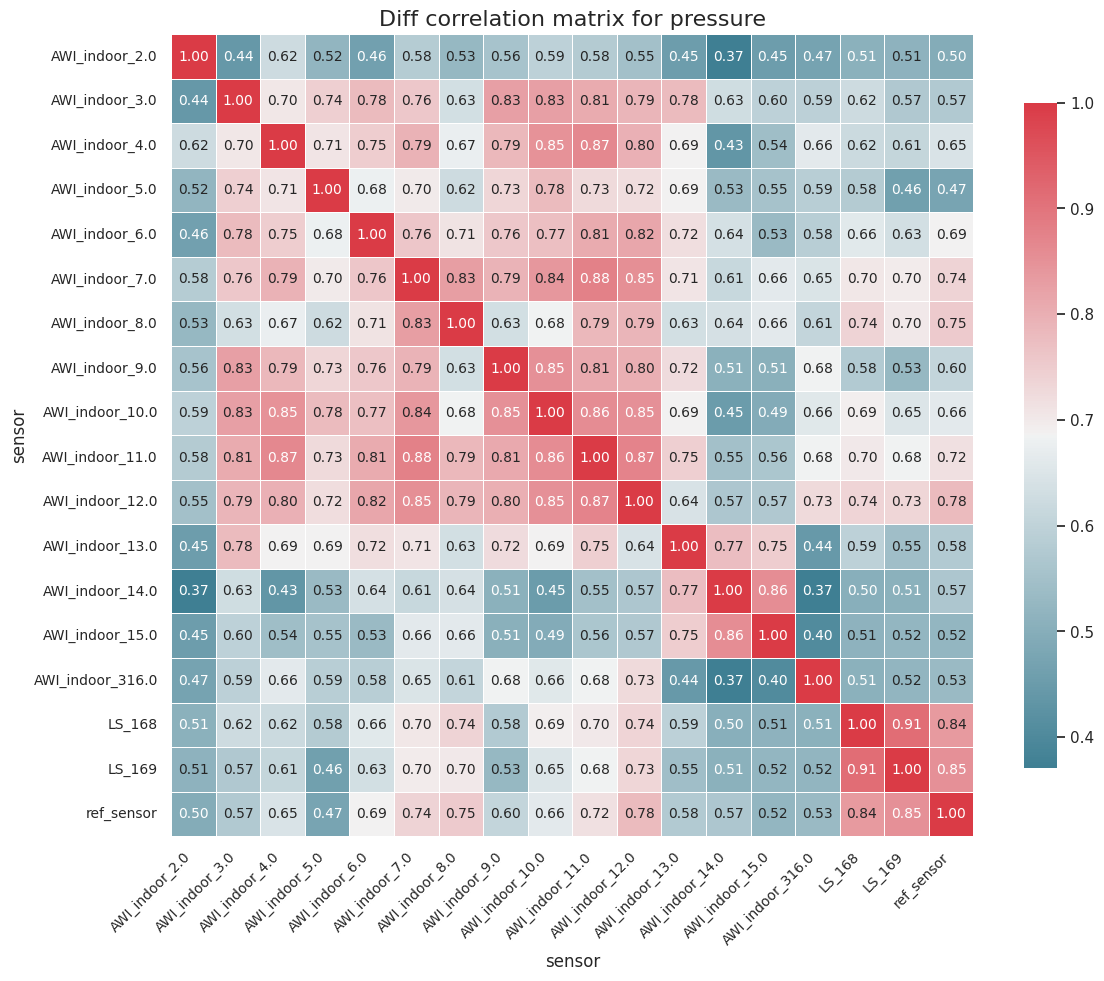

In [21]:
plot_correlation_matrix(df_diff_exp_data.corr(),title="Diff correlation matrix for pressure")